<a href="https://colab.research.google.com/github/Erm010v/Colab/blob/main/GB_SEM_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 12 + Home Work



In [1]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычисления линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<Axes: xlabel='longitude', ylabel='latitude'>

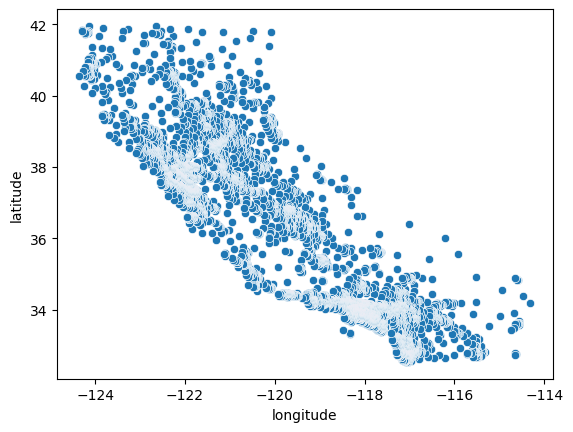

In [5]:
sns.scatterplot(data=df, x = 'longitude', y = 'latitude')

<Axes: xlabel='households', ylabel='population'>

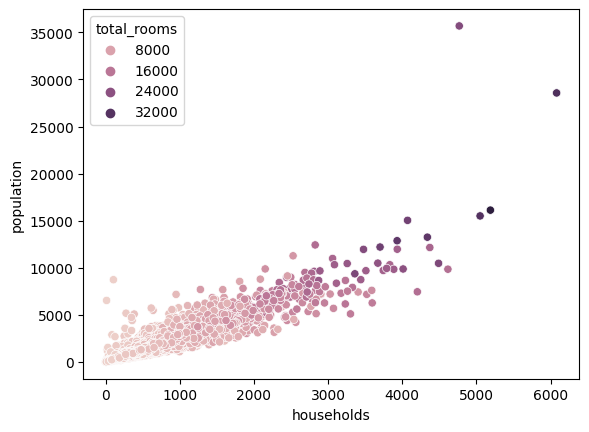

In [7]:
sns.scatterplot(data=df, x = 'households', y = 'population', hue= 'total_rooms')

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [11]:
df.loc[df['total_rooms' ] <= 2, 'size' ] = 'Маленький Дом'
df.loc[(df['total_rooms' ] > 2) & (df['total_rooms'] <= 4), 'size' ] = 'Средний Дом'
df.loc[(df['total_rooms' ] > 4) & (df['total_rooms'] <= 6), 'size' ] = 'Большой Дом'
df.loc[df['total_rooms' ] > 6, 'size' ] = 'Очень Большой Дом'

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'size'],
      dtype='object')

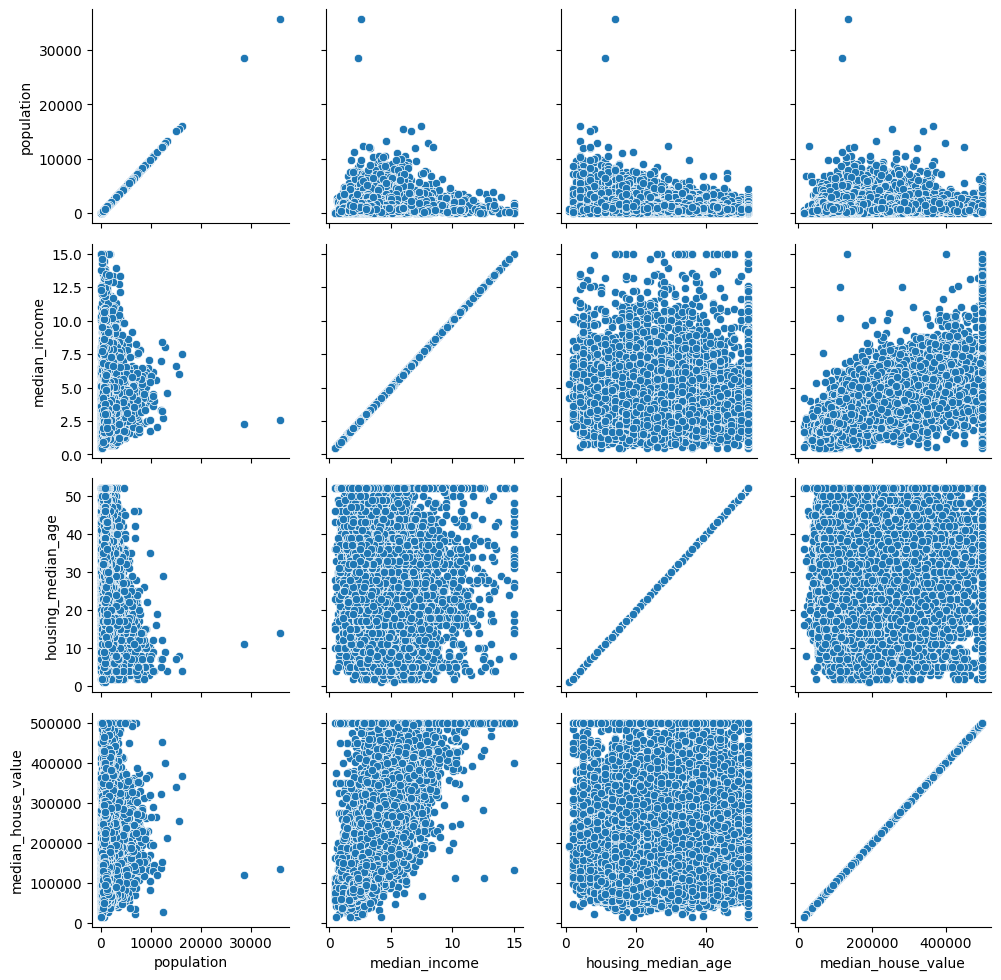

In [13]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

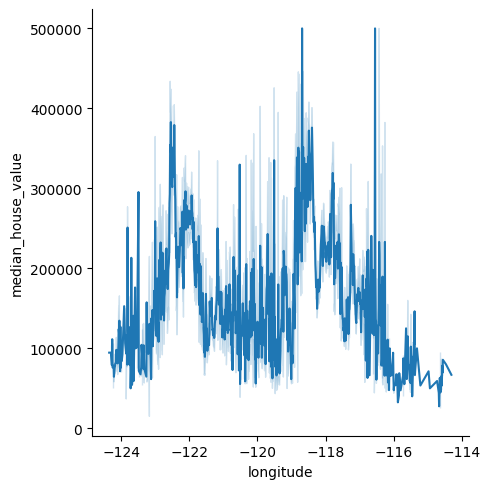

In [14]:
# Линейный график
sns.relplot(x="longitude", y="median_house_value", kind="line", data=df)

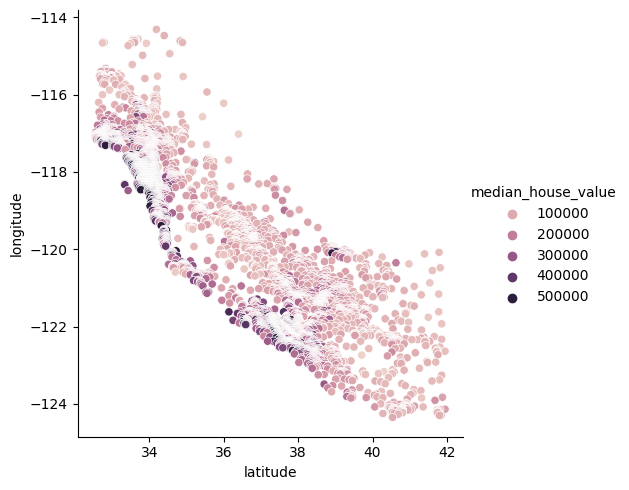

In [15]:
# береговая линия
sns.relplot(data=df, x="latitude",  y="longitude", hue="median_house_value")

<Axes: xlabel='housing_median_age', ylabel='Count'>

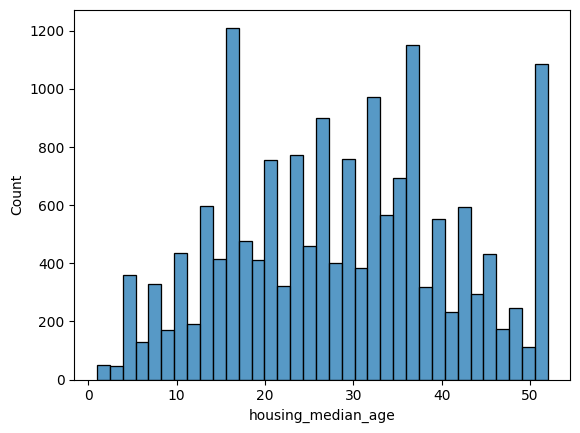

In [17]:
# Гистограмма
sns.histplot(data=df, x="housing_median_age")

<Axes: xlabel='median_income', ylabel='Count'>

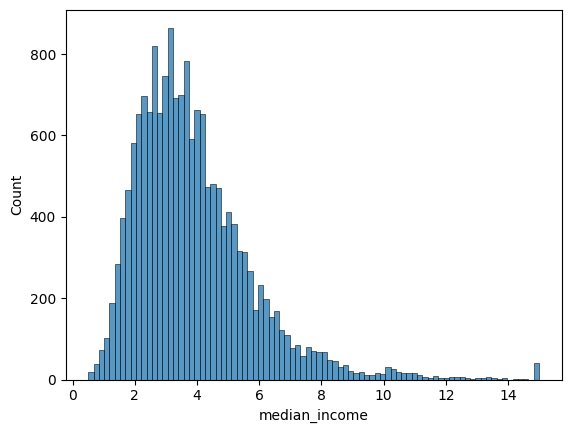

In [18]:
# Гистограмма
sns.histplot(data=df, x="median_income")

<Axes: xlabel='median_income', ylabel='Count'>

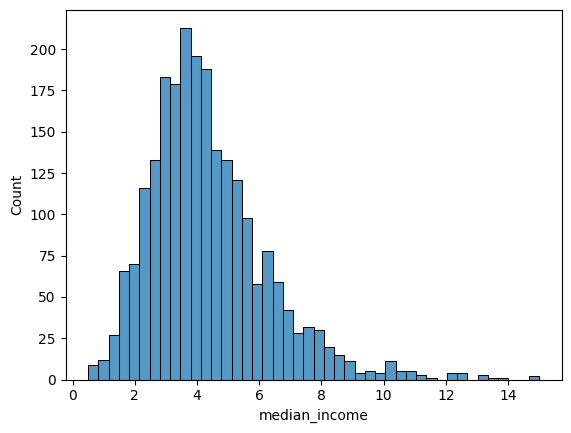

In [19]:
sns.histplot(data = df[df['housing_median_age'] < 15], x="median_income")

<Axes: xlabel='population', ylabel='Count'>

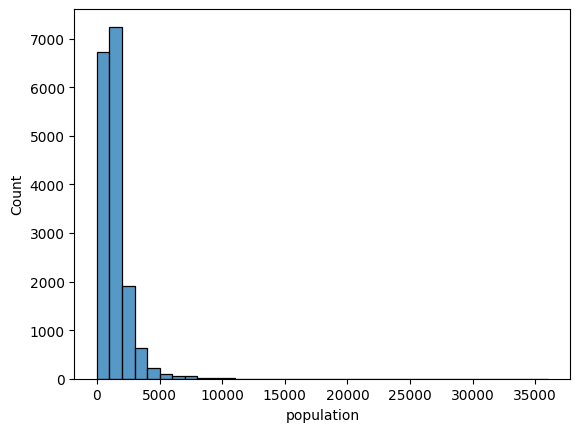

In [22]:
sns.histplot(data=df, x='population',binwidth=1000)

In [23]:
df.loc[df['housing_median_age' ] <= 10, 'age_group' ] = 'Молодые'
df.loc[(df['housing_median_age' ] > 20) & (df['housing_median_age'] <= 50), 'age_group' ] = 'Ср. возраст'
df.loc[df['housing_median_age' ] > 50, 'age_group' ] = 'Пожилые'

<Axes: xlabel='age_group'>

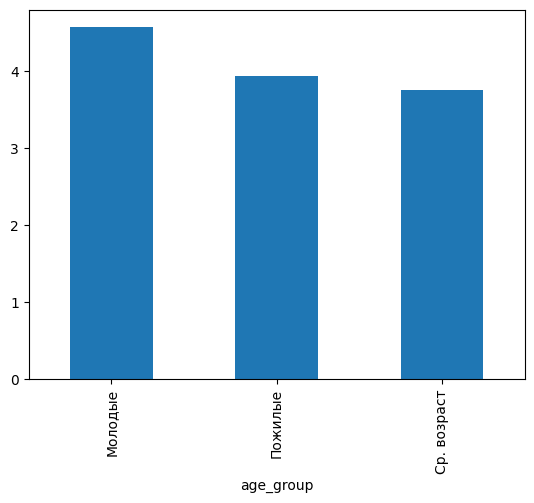

In [24]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')


In [26]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'


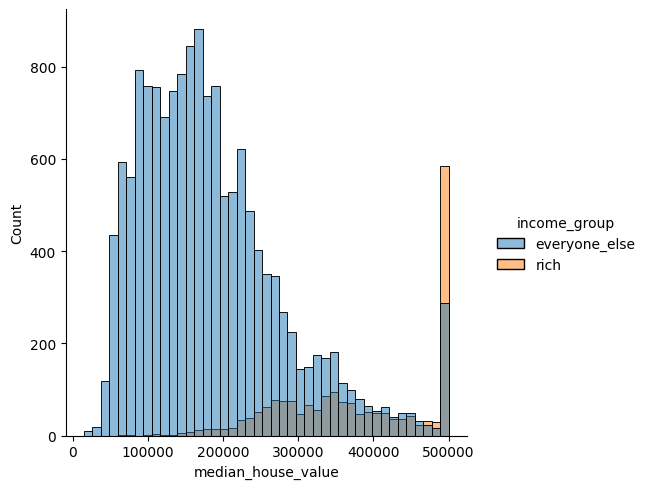

In [27]:
sns.displot(df, x='median_house_value', hue='income_group')

HeatMaps - корреляция

In [57]:
corr = penguins.corr()

<ipython-input-57-aa13ead7998f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = penguins.corr()


In [46]:
import seaborn as sns

<Axes: >

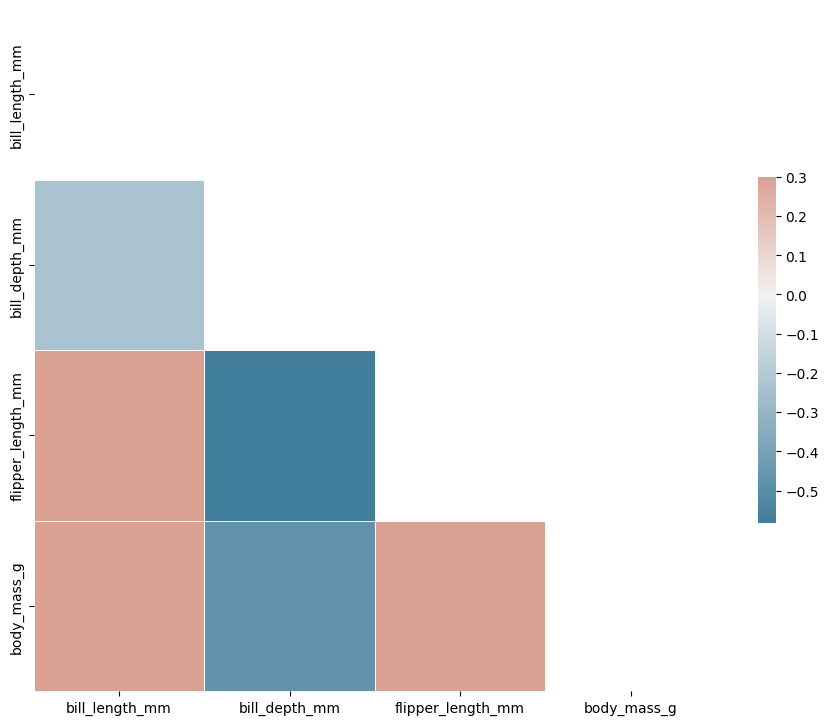

In [61]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# # Создается полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))
# # Создается цветовая палитра
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Визуализируются данные корреляции
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
penguins = sns.load_dataset("penguins")

In [48]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [36]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<Axes: xlabel='species', ylabel='body_mass_g'>

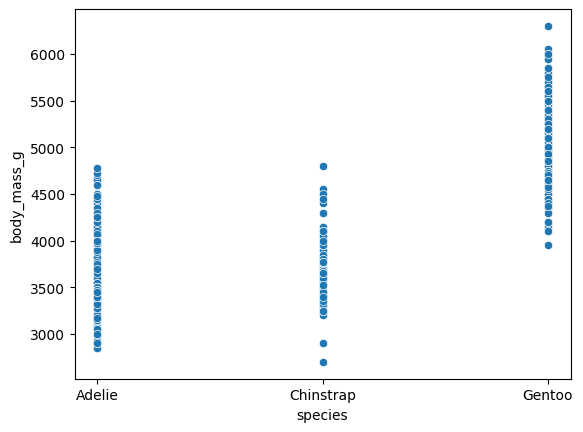

In [49]:
sns.scatterplot(data=penguins, x = 'species', y = 'body_mass_g')

<Axes: xlabel='species', ylabel='body_mass_g'>

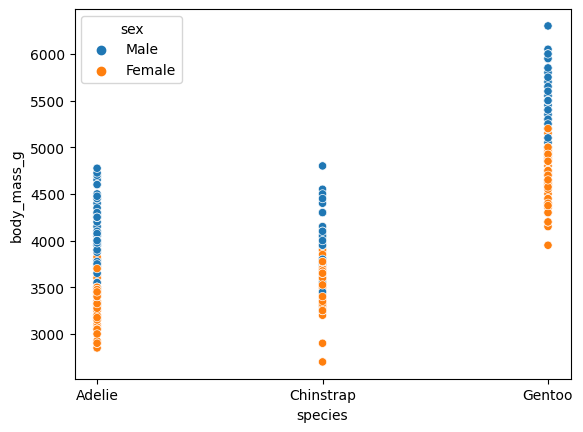

In [55]:
sns.scatterplot(data=penguins, x = 'species', y = 'body_mass_g', hue= 'sex')

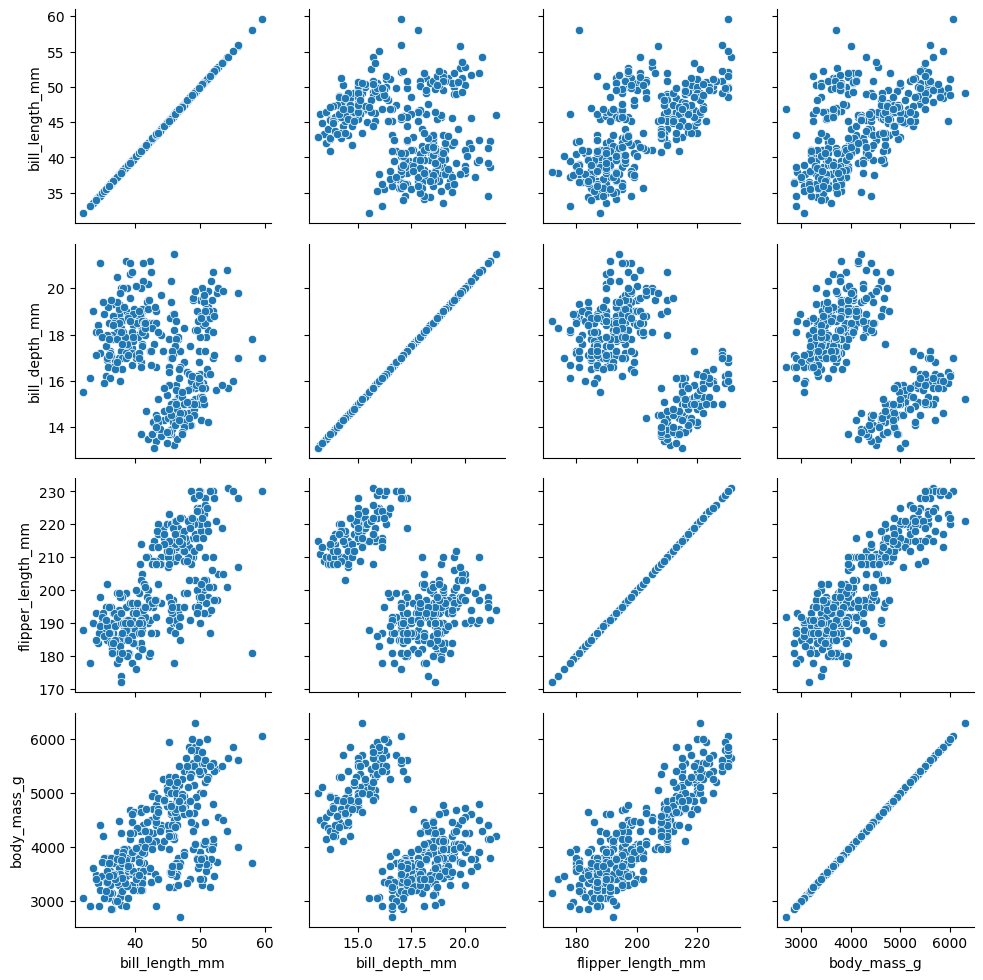

In [56]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
g = sns.PairGrid(penguins[cols])
g.map(sns.scatterplot)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

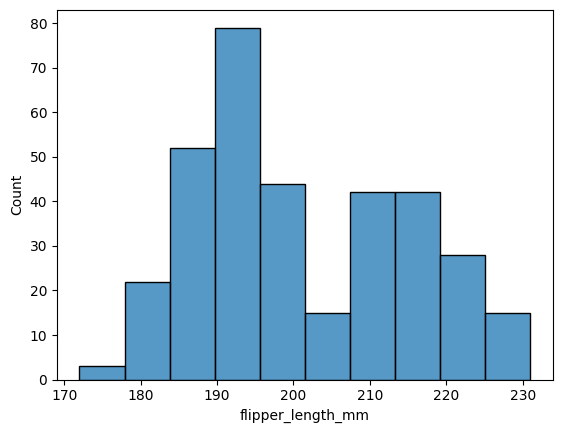

In [62]:
sns.histplot(data=penguins, x='flipper_length_mm')

<Axes: xlabel='sex', ylabel='Count'>

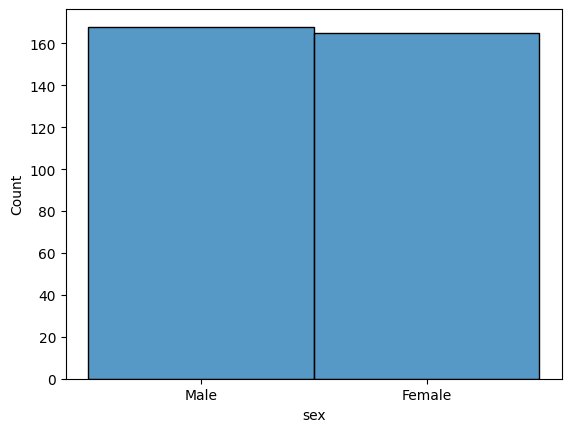

In [63]:
sns.histplot(data=penguins, x='sex')

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

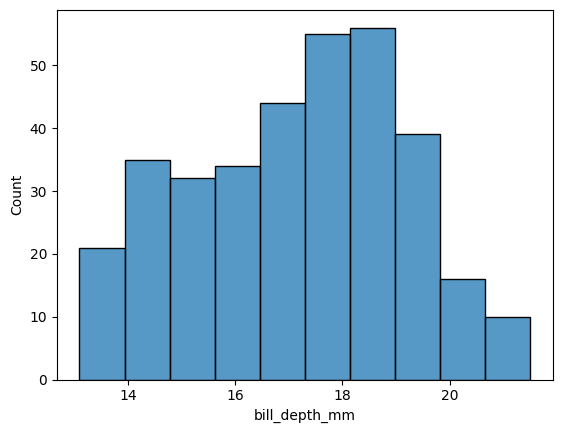

In [64]:
sns.histplot(data=penguins, x='bill_depth_mm')